In [1]:
import pandas as pd 
import os
import funcoes as fc

In [2]:
diretorio = f'../data/'
diretorio

'../data/'

In [3]:
arquivo = os.listdir(diretorio)[0]

In [4]:
tabela1 = pd.read_excel(diretorio + arquivo, 'DRE')

In [5]:
dados_filtrados, tabela2, novas_colunas = fc.filtrar_tabela(tabela1)

c:\Users\Gabriel\Desktop\subida_repositorio_git\petro\src\funcoes.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela['Descricao'] = tabela['Descricao'].str.lower().str.strip().str.replace(r'\s+', ' ', regex=True)


In [6]:
lucro_liquido = fc.funcao_lucro_liquido(tabela2, novas_colunas)

Lucro Líquido por Trimestre: {'1T24': 23810, '4T23': 31163, '1T23': 38307}


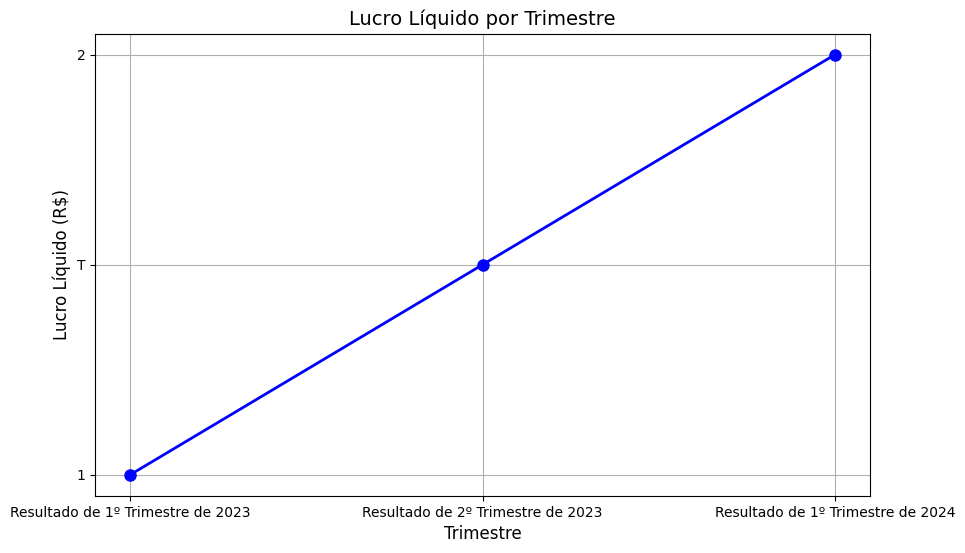

In [7]:
tabela_lucro_liquido = fc.tabela_lucro_liquido_trimestre(novas_colunas[1])

In [8]:
preco_medio_acoes = fc.calcular_preco_medio(novas_colunas[1:])

c:\Users\Gabriel\Desktop\subida_repositorio_git\petro\src\funcoes.py:65: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dados_historicos['Trimestre'] = dados_historicos.index.to_period('Q')


In [9]:
lucro_liquido_lista = list(lucro_liquido.values())

c:\Users\Gabriel\Desktop\subida_repositorio_git\petro\src\funcoes.py:65: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dados_historicos['Trimestre'] = dados_historicos.index.to_period('Q')


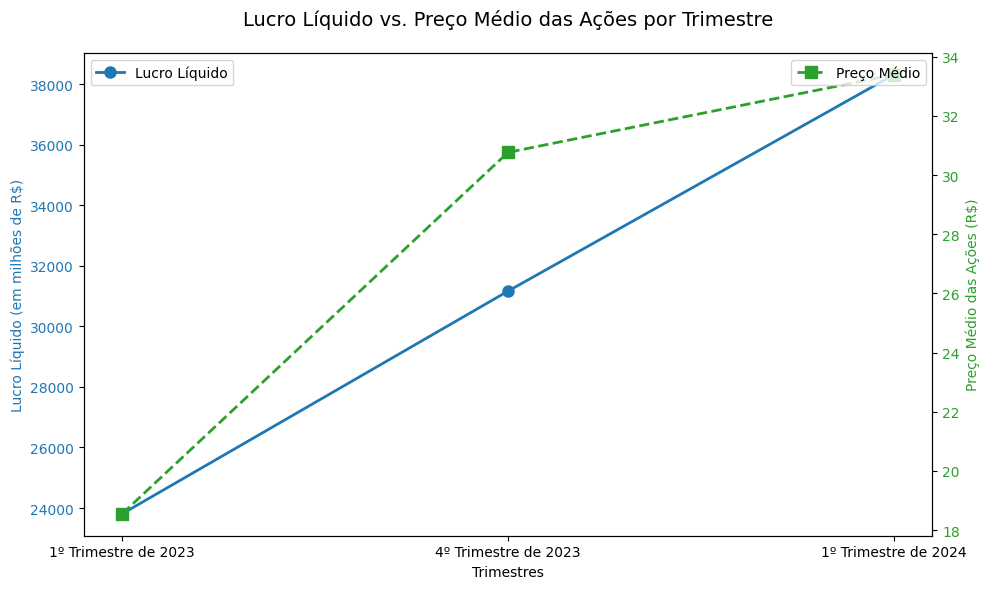

In [10]:
lucro_vs_acoes = fc.comparacao_lucro_acoes(lucro_liquido_lista, novas_colunas)